In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [ ]:
df = pd.read_csv('dataframe_classification.csv')
df.head(10)

,Unnamed: 0,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,1,0,1
1,1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,1,0,1
2,2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,1,0,1
3,3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,1,0,1
4,4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,1,0,1
5,5,23.7600,26.260,568.666667,790.000000,0.004779,14,1,1,0,0,1,0,1
6,6,23.7300,26.290,536.333333,798.000000,0.004776,14,1,1,0,0,1,0,1
7,7,23.7540,26.290,509.000000,797.000000,0.004783,14,1,1,0,0,1,0,1
8,8,23.7540,26.350,476.000000,803.200000,0.004794,14,1,1,0,0,1,0,1
9,9,23.7360,26.390,510.000000,809.000000,0.004796,14,1,1,0,0,1,0,1


# Data preparation

In [ ]:
# mixing all the datasets "datatest.txt", "datatest2.txt" and "datatraining.txt"

from pandas import concat
df = concat([df_test_1, df_training, df_test_2], ignore_index = True)
#df = df.drop(axis)
df.head(10)

#df.to_csv("dataframe.csv")

,no,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,2015-02-02 14:19:00,23.7000,26272.00,585.200000,749.200000,0.004764,1
1,141,2015-02-02 14:19:59,23718.0000,26.29,578.400000,760.400000,0.004773,1
2,142,2015-02-02 14:21:00,23.7300,26.23,572.666667,769.666667,0.004765,1
3,143,2015-02-02 14:22:00,23.7225,26125.00,493.750000,774.750000,0.004744,1
4,144,2015-02-02 14:23:00,23754.0000,26.20,488.600000,779.000000,0.004767,1
5,145,2015-02-02 14:23:59,23.7600,26.26,568.666667,790.000000,0.004779,1
6,146,2015-02-02 14:25:00,23.7300,26.29,536.333333,798.000000,0.004776,1
7,147,2015-02-02 14:25:59,23754.0000,26.29,509.000000,797.000000,0.004783,1
8,148,2015-02-02 14:26:59,23754.0000,26.35,476.000000,803.200000,0.004794,1
9,149,2015-02-02 14:28:00,23736.0000,26.39,510.000000,809.000000,0.004796,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'Temperature', 'Humidity', 'Light', 'CO2',
       'HumidityRatio', 'Hours', 'Office_Hours', 'Working_day',
       'Time_blocks_0', 'Time_blocks_1', 'Time_blocks_2', 'Time_blocks_3',
       'Occupancy'],
      dtype='object')

In [ ]:
# splitting the variable "date" in other variables that can be used after "Dates", "Time", "Hours", "Minutes", "Seconds"

import datetime

df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['Hours'] = pd.to_datetime(df['date']).dt.hour
df['Minutes'] = pd.to_datetime(df['date']).dt.minute
df['Seconds'] = pd.to_datetime(df['date']).dt.second

df.sample(10)

,no,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Dates,Time,Hours,Minutes,Seconds
9934,7270,2015-02-09 19:00:00,21.100,36.2000,0.0,1303.00,0.005612,0,2015-02-09,19:00:00,19,0,0
8722,6058,2015-02-08 22:47:59,19.500,27745.0000,0.0,451.50,0.003886,0,2015-02-08,22:47:59,22,47,59
6367,3703,2015-02-07 07:33:00,19.700,19.4175,0.0,448.75,0.002748,0,2015-02-07,07:33:00,7,33,0
12370,1563,2015-02-12 16:50:00,22.100,27.5750,444.0,600.00,0.004537,1,2015-02-12,16:50:00,16,50,0
13199,2392,2015-02-13 06:39:00,20.890,25.1500,0.0,542.00,0.003838,0,2015-02-13,06:39:00,6,39,0
17552,6745,2015-02-16 07:12:00,20.390,24.7000,0.0,806.00,0.003654,0,2015-02-16,07:12:00,7,12,0
8750,6086,2015-02-08 23:16:00,19.500,27.6000,0.0,452.00,0.003865,0,2015-02-08,23:16:00,23,16,0
10129,7465,2015-02-09 22:14:59,20.500,33.2900,0.0,622.00,0.004969,0,2015-02-09,22:14:59,22,14,59
19762,8955,2015-02-17 20:02:00,21.050,34.1450,0.0,1515.50,0.005274,0,2015-02-17,20:02:00,20,2,0
14856,4049,2015-02-14 10:15:59,20.025,36.5225,31.0,510.50,0.005296,0,2015-02-14,10:15:59,10,15,59


In [ ]:
df.dtypes

no                 int64
date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
Dates             object
Time              object
Hours              int64
Minutes            int64
Seconds            int64
dtype: object

In [ ]:
# creating a variable which take the 4 time blocks of a day 
# lets divide in to [day 6-12, afternoon 12-6, evening 6-12, night 12-6]  

df['time_blocks'] = df['Hours'] // 6 

In [ ]:
df.sample(100)

,no,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Dates,Time,Hours,Minutes,Seconds,time_blocks
15962,5155,2015-02-15 04:41:59,20.100000,32.466667,0.000000,566.666667,0.004726,0,2015-02-15,04:41:59,4,41,59,0
14388,3581,2015-02-14 02:28:00,19.790000,36.200000,0.000000,502.000000,0.005172,0,2015-02-14,02:28:00,2,28,0,0
3159,495,2015-02-05 02:05:00,21.000000,25.000000,0.000000,439.000000,0.003841,0,2015-02-05,02:05:00,2,5,0,0
20226,9419,2015-02-18 03:46:00,20.790000,26.245000,0.000000,1347.500000,0.003982,0,2015-02-18,03:46:00,3,46,0,0
8824,6160,2015-02-09 00:29:59,19.500000,26.890000,0.000000,458.000000,0.003765,0,2015-02-09,00:29:59,0,29,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,1697,2015-02-05 22:07:00,20.600000,20.600000,0.000000,454.000000,0.003084,0,2015-02-05,22:07:00,22,7,0,3
18138,7331,2015-02-16 16:58:00,21.700000,29.790000,429.000000,933.500000,0.004785,1,2015-02-16,16:58:00,16,58,0,2
14153,3346,2015-02-13 22:33:00,20.100000,31.600000,0.000000,512.000000,0.004599,0,2015-02-13,22:33:00,22,33,0,3
16306,5499,2015-02-15 10:25:59,22.000000,28.815000,345.666667,637.000000,0.004713,0,2015-02-15,10:25:59,10,25,59,1


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#encoding "time_blocks"

le = LabelEncoder()
num_classes = le.fit_transform(df['time_blocks'])
print(num_classes[:10])

[2 2 2 2 2 2 2 2 2 2]


In [ ]:
df.dtypes

no                 int64
date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
Dates             object
Time              object
Hours              int64
Minutes            int64
Seconds            int64
time_blocks        int64
dtype: object

In [ ]:
# removing columns that we don't need for the classification

class_name = 'Occupancy'
columns2remove = ['no', 'date','Dates','Time','Hours','Minutes','Seconds', 'Humidity']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Light,CO2,HumidityRatio,Occupancy,time_blocks
0,23.7000,585.200000,749.200000,0.004764,1,2
1,23718.0000,578.400000,760.400000,0.004773,1,2
2,23.7300,572.666667,769.666667,0.004765,1,2
3,23.7225,493.750000,774.750000,0.004744,1,2
4,23754.0000,488.600000,779.000000,0.004767,1,2


In [ ]:
def prepare_dataset(df, class_name):
    df = remove_missing_values(df)
    numeric_columns = get_numeric_columns(df)
    rdf = df.copy(deep=True)
    df, feature_names, class_values = one_hot_encoding(df, class_name)
    real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
    rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
    features_map = get_features_map(feature_names, real_feature_names)

    return df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map

def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df

def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns

def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1, join_axes=[dfX.index])
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values

def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map

In [ ]:
class_name = 'Occupancy'
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [ ]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
columns = ['Temperature', 'Light', 'CO2', 'HumidityRatio']
sc_X.fit(np.array(df[columns]))
df[columns] = sc_X.transform(np.array(df[columns]))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((16448, 13), (4112, 13))

## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# executes a loop from 1 to 50. 
#In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=41, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=44, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=46, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=47, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate K Value')

Text(0.5, 0, 'K Value')

Text(0, 0.5, 'Mean Error')

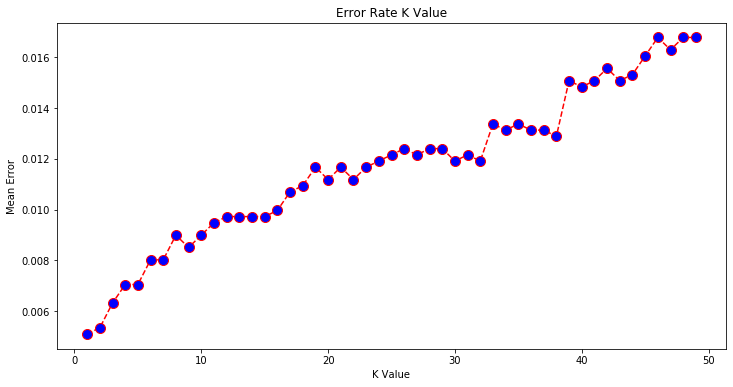

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
clf = KNeighborsClassifier(n_neighbors=7, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Accuracy 0.9919747081712063
F1-score [0.99478426 0.98260411]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3162
           1       0.98      0.98      0.98       950

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [ ]:
clf = KNeighborsClassifier(n_neighbors=50, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Accuracy 0.9837062256809338
F1-score [0.98938698 0.96493982]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3162
           1       0.96      0.97      0.96       950

    accuracy                           0.98      4112
   macro avg       0.98      0.98      0.98      4112
weighted avg       0.98      0.98      0.98      4112



In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Accuracy 0.9948929961089494
F1-score [0.99667774 0.98896479]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3162
           1       0.99      0.99      0.99       950

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

Accuracy 0.9941634241245136
F1-score [0.99620373 0.9873817 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3162
           1       0.99      0.99      0.99       950

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy 0.9929474708171206
F1-score [0.99541357 0.98474487]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3162
           1       0.98      0.99      0.98       950

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [ ]:
# 128 is the result of sqrt(16448) that is the total value of the training set

clf = KNeighborsClassifier(n_neighbors=18, metric='manhattan', weights='uniform') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

Accuracy 0.9895428015564203
F1-score [0.99320588 0.97730871]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3162
           1       0.98      0.97      0.98       950

    accuracy                           0.99      4112
   macro avg       0.99      0.98      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [ ]:

X_train = df.drop('Occupancy', axis=1)
y_train = df['Occupancy']


features_combs_list = [
    ('Temperature', 'HumidityRatio'),
    ('Temperature', 'Light'),
    ('Temperature', 'CO2'),
     ('Temperature', 'time_blocks'),
    ('HumidityRatio', 'Light'),
    ('HumidityRatio', 'CO2'),
    ('HumidityRatio', 'time_blocks'),
    ('Light', 'CO2'),
    ('Light', 'time_blocks'),
    ('time_blocks', 'CO2'),
    ('Temperature', 'HumidityRatio', 'Light'),
    ('Temperature', 'HumidityRatio', 'CO2'),
    ('Temperature', 'HumidityRatio', 'time_blocks'),
    ('HumidityRatio', 'Light', 'CO2' ),
    ('HumidityRatio', 'Light', 'time_blocks' ),
    ('Light', 'CO2', 'time_blocks'),
('Temperature', 'HumidityRatio', 'Light', 'CO2'), 
('Temperature', 'HumidityRatio', 'Light', 'time_blocks'),
('HumidityRatio', 'Light', 'CO2','time_blocks' )
]

In [ ]:
#evaluating the K-NN for different parameters

from sklearn.neighbors import KNeighborsClassifier

hyper_params_space = [
    {
        'n_neighbors': np.arange(1, 50),
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train('Light')

    knn = GridSearchCV(KNeighborsClassifier(), hyper_params_space,
                       scoring='accuracy', cv = 3)
    knn.fit(X, y_train)
    
    print('Best parameters set:')
    print(knn.best_params_)
    print()
    
    preds = [
        (knn.predict(X), y_train, 'Train'),
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Temperature', 'HumidityRatio')


TypeError: 'DataFrame' object is not callable

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9818 (+/- 0.014)
F1-score: 0.9753 (+/- 0.019)


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.9790961749725358


<Figure size 576x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

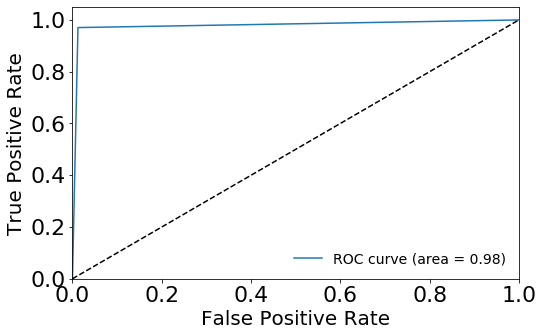

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [ ]:
import scikitplot as skplt

skplt.plot_lift_curve(y_test, y_score)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

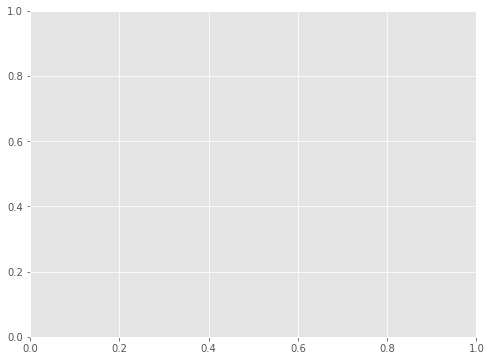

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen'}
x_min, x_max = X_train.min(), X_train.max()
y_min, y_max = X_train.min(), X_train.max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max),#, resolution),
                     np.arange(y_min, y_max))#, resolution))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

#  Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20560 non-null  int64  
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Hours          20560 non-null  int64  
 7   Office_Hours   20560 non-null  int64  
 8   Working_day    20560 non-null  int64  
 9   Time_blocks_0  20560 non-null  int64  
 10  Time_blocks_1  20560 non-null  int64  
 11  Time_blocks_2  20560 non-null  int64  
 12  Time_blocks_3  20560 non-null  int64  
 13  Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.2 MB


In [ ]:
#selecting the variable which we want to use for Logistic Regression

selected_columns = ['Light']
class_name = 'Occupancy'

attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

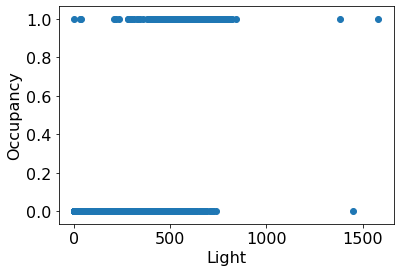

In [ ]:
#plotting the scatterplot of X_train and y_train
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#applying Logistic Regression 
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test) #lbfgs

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9871919584954605
F1-score [0.99161448 0.9728988 ]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4743
           1       0.95      1.00      0.97      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [ ]:
from scipy.special import expit

Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

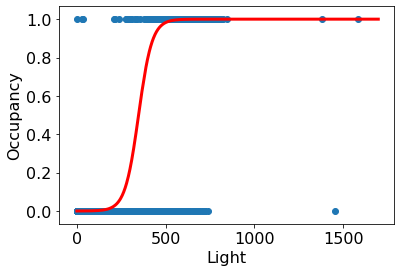

In [ ]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:

X_train = df.drop('Occupancy', axis=1)
y_train = df['Occupancy']


features_combs_list = [
    ('Temperature', 'HumidityRatio'),
    ('Temperature', 'Light'),
    ('Temperature', 'CO2'),
     ('Temperature', 'time_blocks'),
    ('HumidityRatio', 'Light'),
    ('HumidityRatio', 'CO2'),
    ('HumidityRatio', 'time_blocks'),
    ('Light', 'CO2'),
    ('Light', 'time_blocks'),
    ('time_blocks', 'CO2'),
    ('Temperature', 'HumidityRatio', 'Light'),
    ('Temperature', 'HumidityRatio', 'CO2'),
    ('Temperature', 'HumidityRatio', 'time_blocks'),
    ('HumidityRatio', 'Light', 'CO2' ),
    ('HumidityRatio', 'Light', 'time_blocks' ),
    ('Light', 'CO2', 'time_blocks'),
('Temperature', 'HumidityRatio', 'Light', 'CO2'), 
('Temperature', 'HumidityRatio', 'Light', 'time_blocks'),
('HumidityRatio', 'Light', 'CO2','time_blocks' )
]

In [ ]:
#evaluating the Logistic Regression for different parameters
from sklearn.linear_model import LogisticRegression

hyper_params_space = [
    {
        'penalty': ['l2'],
        'C': [1, 1.2, 1.5],
        'random_state': [0]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]

    
    logit = GridSearchCV(clf, hyper_params_space,
                        scoring='accuracy', cv = 4)
    logit.fit(X, y_train)

    print('Best parameters set:')
    print(logit.best_params_)
    print()
    
    preds = [
        (logit.predict(X), y_train, 'Train'),
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('Temperature', 'HumidityRatio')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     15810
           1       0.00      0.00      0.00      4750

    accuracy                           0.77     20560
   macro avg       0.38      0.50      0.43     20560
weighted avg       0.59      0.77      0.67     20560


Train Confusion Matrix:
[[15810     0]
 [ 4750     0]]

('Temperature', 'Light')


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.97      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15559   251]
 [   22  4728]]

('Temperature', 'CO2')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     15810
           1       0.58      0.32      0.41      4750

    accuracy                           0.79     20560
   macro avg       0.70      0.62      0.64     20560
weighted avg       0.76      0.79      0.76     20560


Train Confusion Matrix:
[[14708  1102]
 [ 3252  1498]]

('Temperature', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     15810
           1       0.00      0.00      0.00      4750

    accuracy                           0.77     20560
   macro avg       0.38      0.50      0.43     20560
weighted avg       0.59      0.77      0.67     20560


Train Confusion Matrix:
[[15810     0]
 [ 4750     0]]

('HumidityRatio', 'Light')


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.97      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15557   253]
 [   22  4728]]

('HumidityRatio', 'CO2')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     15810
           1       0.58      0.31      0.40      4750

    accuracy                           0.79     20560
   macro avg       0.70      0.62      0.64     20560
weighted avg       0.76      0.79      0.76     20560


Train Confusion Matrix:
[[14721  1089]
 [ 3276  1474]]

('HumidityRatio', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     15810
           1       0.00      0.00      0.00      4750

    accuracy                           0.77     20560
   macro avg       0.38      0.50      0.43     20560
weighted avg       0.59      0.77      0.67     20560


Train Confusion Matrix:
[[15810     0]
 [ 4750     0]]

('Light', 'CO2')


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.96      1.00      0.98      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15608   202]
 [   19  4731]]

('Light', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15581   229]
 [   21  4729]]

('time_blocks', 'CO2')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     15810
           1       0.57      0.31      0.40      4750

    accuracy                           0.79     20560
   macro avg       0.70      0.62      0.64     20560
weighted avg       0.76      0.79      0.76     20560


Train Confusion Matrix:
[[14716  1094]
 [ 3278  1472]]

('Temperature', 'HumidityRatio', 'Light')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.97      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15559   251]
 [   22  4728]]

('Temperature', 'HumidityRatio', 'CO2')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     15810
           1       0.58      0.32      0.41      4750

    accuracy                           0.79     20560
   macro avg       0.70      0.62      0.64     20560
weighted avg       0.76      0.79      0.76     20560


Train Confusion Matrix:
[[14708  1102]
 [ 3252  1498]]

('Temperature', 'HumidityRatio', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     15810
           1       0.00      0.00      0.00      4750

    accuracy                           0.77     20560
   macro avg       0.38      0.50      0.43     20560
weighted avg       0.59      0.77      0.67     20560


Train Confusion Matrix:
[[15810     0]
 [ 4750     0]]

('HumidityRatio', 'Light', 'CO2')


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.96      1.00      0.98      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15608   202]
 [   19  4731]]

('HumidityRatio', 'Light', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15581   229]
 [   21  4729]]

('Light', 'CO2', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.96      1.00      0.98      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15608   202]
 [   19  4731]]

('Temperature', 'HumidityRatio', 'Light', 'CO2')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.96      1.00      0.98      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15608   202]
 [   19  4731]]

('Temperature', 'HumidityRatio', 'Light', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.95      1.00      0.97      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.98     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15580   230]
 [   21  4729]]

('HumidityRatio', 'Light', 'CO2', 'time_blocks')


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1000, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 1.2, 1.5], 'penalty': ['l2'],
                          'random_state': [0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best parameters set:
{'C': 1, 'penalty': 'l2', 'random_state': 0}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15810
           1       0.96      1.00      0.98      4750

    accuracy                           0.99     20560
   macro avg       0.98      0.99      0.99     20560
weighted avg       0.99      0.99      0.99     20560


Train Confusion Matrix:
[[15608   202]
 [   19  4731]]



In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.9899537268217985


<Figure size 576x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

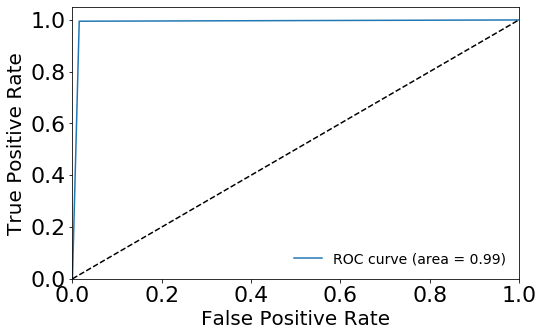

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.9891 (+/- 0.011)


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1-score: 0.9851 (+/- 0.015)
